In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
data = pd.read_pickle("./clean_data.pickle")

In [78]:
x = data.drop(columns=["salary"])
y = data["salary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [79]:
neighbors = np.arange(1, 21)
cv_scores_mean = []

# Calcular la precisión promedio para cada valor de k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores_mean.append(scores.mean())

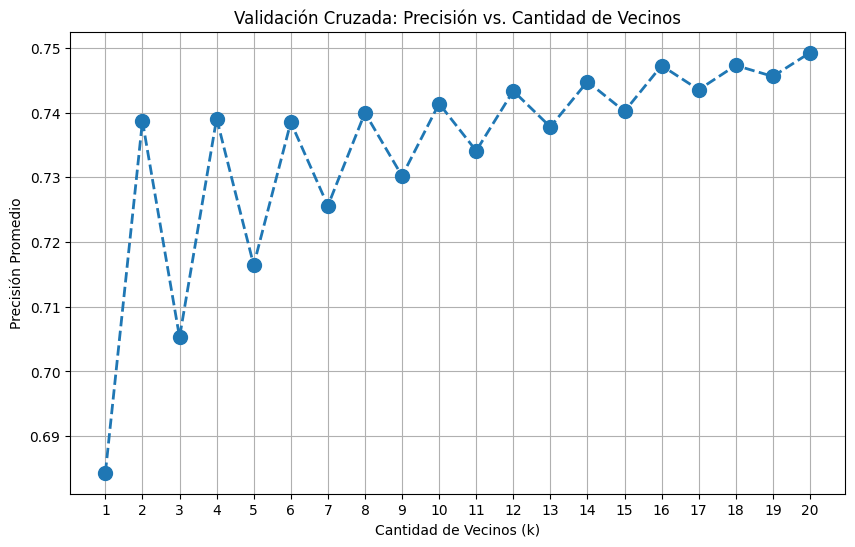

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores_mean, marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt.title('Validación Cruzada: Precisión vs. Cantidad de Vecinos')
plt.xlabel('Cantidad de Vecinos (k)')
plt.ylabel('Precisión Promedio')
plt.grid(True)
plt.xticks(neighbors)
plt.show()

In [81]:
model = KNeighborsClassifier(n_neighbors=4)

In [82]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [83]:
y_pred = model.predict(x_test)

In [84]:
confusion_matrix(y_test, y_pred)

array([[9496,  697],
       [2888,  486]], dtype=int64)

In [85]:
model.score(x_test, y_test)

0.7357558782339501

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84     10193
           1       0.41      0.14      0.21      3374

    accuracy                           0.74     13567
   macro avg       0.59      0.54      0.53     13567
weighted avg       0.68      0.74      0.69     13567

